In [1]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import pandas as pd
import corner
import time
from scipy.stats import multivariate_normal

plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'large'

from model_selection import Evidence_model_selection as EMS

# Experiment: 2 term truth with 2 moment

In [2]:
# Set up the experiment
nTruth = 2
nMoment = 2
param_Truth = [2., 1.5, 0.9,0.1]

In [3]:
# Initialize the model selection object
Ex1 = EMS(nTruth,nMoment,param_Truth)

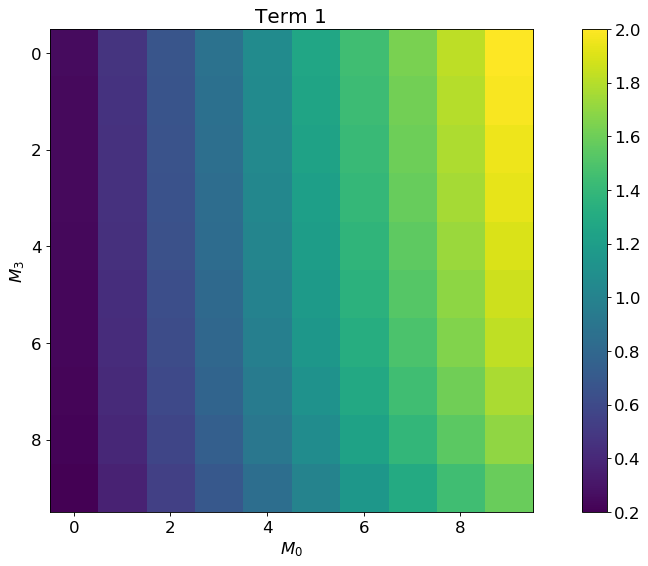

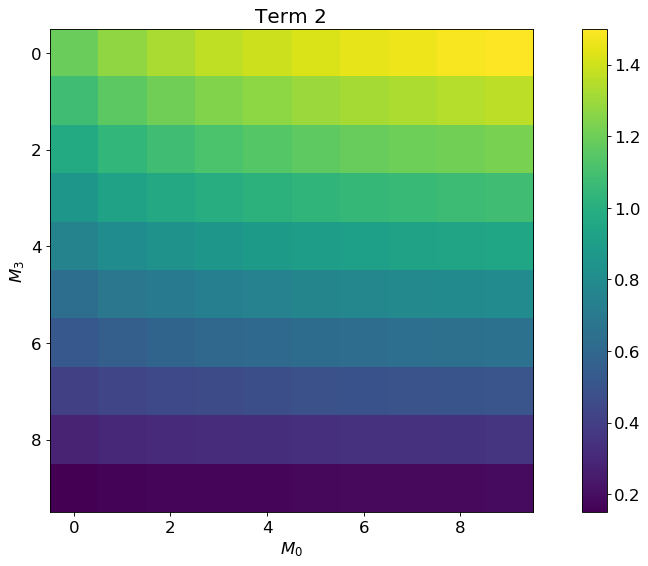

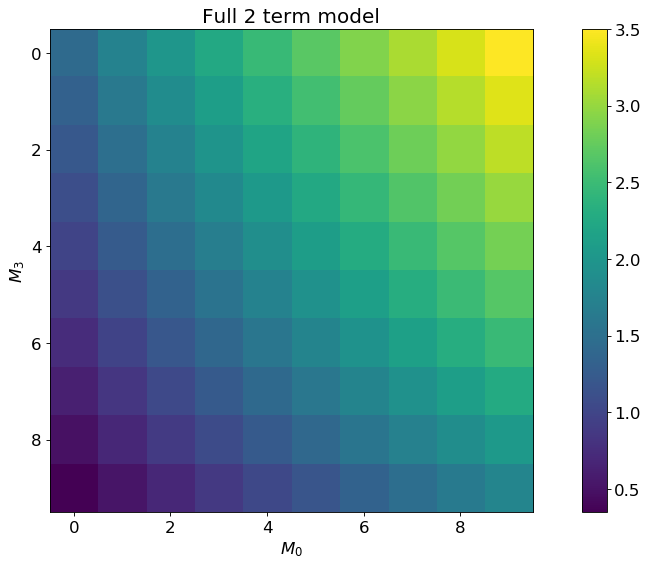

In [ ]:
# Run a synthetic experiment and generate data, the data becomes an attribute of the object
Ex1.get_data()
# Plot the data
Ex1.plot_truth()

In [ ]:
# Run model selection

# Models indicates how many models are being compared, the integer references the number of terms in the model
# dlnZ_tol is the tolerance for estimated the log evidence using thermodynamic integration
# MCMC_Steps is the number of steps in each MCMC chain

Ex1.model_selection(Models=[1, 2, 3], dlnZ_tol=0.5, MCMC_Steps=2000)

Model 1  has error > tolerance, increasing the number of temperatures to  95
      Current log evidence and estimation error: lnZ =  5.497248325299608 , dlnZ =  0.6558727106345197
Model 1  has error > tolerance, increasing the number of temperatures to  115
      Current log evidence and estimation error: lnZ =  5.381092543402797 , dlnZ =  0.5344473898960294
Model 2  has error > tolerance, increasing the number of temperatures to  155
      Current log evidence and estimation error: lnZ =  9.849204681901782 , dlnZ =  0.5708806432664808


In [ ]:
# Run a long MCMC simulation for the selected model to view the parameter space

Ex1.ntemps = 10 # Reset the number of temperatures used to make the long MCMC simulation shorter

sampler = Ex1.run_MCMC(nTerms=Ex1.selected_model,MCMC_Steps = int(1E4))

In [ ]:
# Plot the results
Ex1.plot_sampler(sampler,nTerms=Ex1.selected_model)